# Revou Capstone DA

#### IMPORT PACKAGES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn .preprocessing import MinMaxScaler

# For Outlier
from scipy.stats import chi2
from matplotlib import patches
import statistics

#### READ DATASET

In [ ]:
# Connect to Gdrive
from google.colab import drive
drive.mount('/content/gddrive')

Mounted at /content/gddrive


In [ ]:
path = '/content/gddrive/MyDrive/RevoU/'

data = path + 'hotel_bookings.csv'

df = pd.read_csv(data)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#### PROBLEM STATEMENT

### Data Pre-Processing

#### Handling Missing Value

In [ ]:
# cek missing value
missing_value = df.isnull().sum()

In [ ]:
# menghitung ratio missing value
rasio = missing_value.div(len(df))
rasio

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

Karena data sangat banyak yang kosong, sebelum menghapusnya, mari kita ubah jadi string dulu, siapa tau ada insight dari situ

In [ ]:
# Replace NULL with a default string
df['company'].fillna('Unknown', inplace=True)
df['agent'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

In [ ]:
#Permasalahan missing value pada kolom Register Date dapat diatasi dengan modus
df['children'].fillna(df['children'].mode()[0], inplace = True)

In [ ]:
# Cek kembali apakah masih terdapat missing value
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
# Kolom company memiliki jumlah missing value hingga 94% sehingga kolom company lebih baik dihilangkan (drop) dari table
#df = df.drop(['company'], axis=1)

#### Handling Duplicated Data

In [ ]:
#mengidentifikasi apakah terdapat duplicate value pada data dengan acuan Nomor Transaksi dan Merchant ID
df[df[['ID_pesanan', 'Tanggal_pesan', 'Tanggal_kirim', 'Metode_pengiriman', 'ID_pelanggan', 'Nama_pelanggan', 'Kategori', 'Sub_kategori', 'Nama_produk', 'Penjualan']].duplicated(keep=False)].sort_values("ID_pelanggan")

,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Kode_pos,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung
3405,3406,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281372.0,2,0.3,-120588.0
3406,3407,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281372.0,2,0.3,-120588.0


In [ ]:
#menghapus duplicate value pada tabel
df = df.drop_duplicates(subset=['ID_pesanan', 'Tanggal_pesan', 'Tanggal_kirim', 'Metode_pengiriman', 'ID_pelanggan', 'Nama_pelanggan', 'Kategori', 'Sub_kategori', 'Nama_produk', 'Penjualan']).reset_index()

In [ ]:
#cek kembali apakah masih terdapat data yang duplicate
df[df[['ID_pesanan', 'Tanggal_pesan', 'Tanggal_kirim', 'Metode_pengiriman', 'ID_pelanggan', 'Nama_pelanggan', 'Kategori', 'Sub_kategori', 'Nama_produk', 'Penjualan']].duplicated(keep=False)].sort_values("ID_pelanggan")

,index,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,...,Kode_pos,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              9993 non-null   int64  
 1   Index              9993 non-null   int64  
 2   ID_pesanan         9993 non-null   object 
 3   Tanggal_pesan      9993 non-null   object 
 4   Tanggal_kirim      9993 non-null   object 
 5   Metode_pengiriman  9993 non-null   object 
 6   ID_pelanggan       9993 non-null   object 
 7   Nama_pelanggan     9993 non-null   object 
 8   Segmen_pelanggan   9993 non-null   object 
 9   Kota               9993 non-null   object 
 10  Negara             9993 non-null   object 
 11  Kode_pos           9993 non-null   int64  
 12  Wilayah            9993 non-null   object 
 13  ID_produk          9993 non-null   object 
 14  Kategori           9993 non-null   object 
 15  Sub_kategori       9993 non-null   object 
 16  Nama_produk        9993 

#### Reformatting

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


#### Handling Outlier

###Versi Laglag

In [ ]:
# List untuk menyimpan hasil
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(df))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
is_canceled,0.000000
lead_time,2.516961
arrival_date_year,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.221962
stays_in_week_nights,2.809281
adults,24.884831
children,7.194907
babies,0.768071


{'whiskers': [<matplotlib.lines.Line2D at 0x7f0703154220>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0703154760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f07030e3f40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0703154ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0703154f40>],
 'means': []}

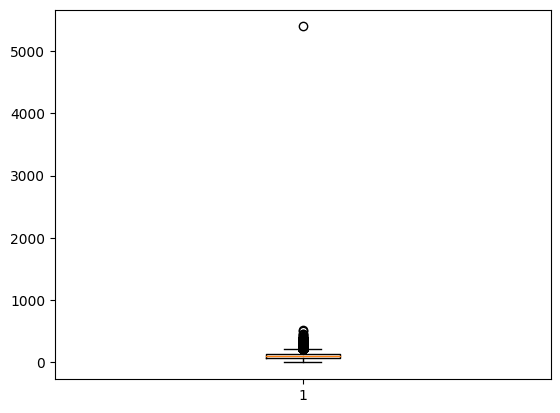

In [ ]:
# Persebaran kolom adr
plt.boxplot(df['adr'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f070302a110>,
 'caps': [<matplotlib.lines.Line2D at 0x7f070302a650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0703029e70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f070302ab90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f070302ae30>],
 'means': []}

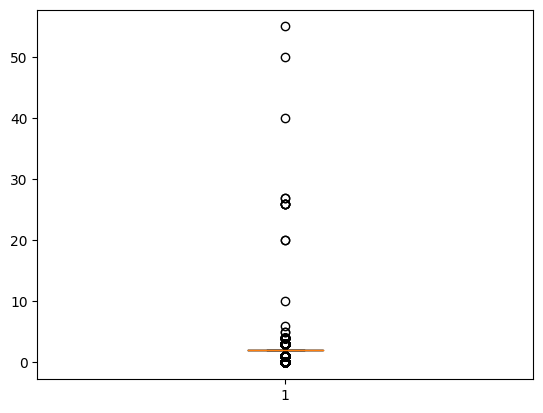

In [ ]:
# Persebaran kolom adr
plt.boxplot(df['adults'])

kolom adults dibuat kurang dari 10 orang

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0702eacfa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0702ead4e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0702eacd00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0702eada20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0702eadcc0>],
 'means': []}

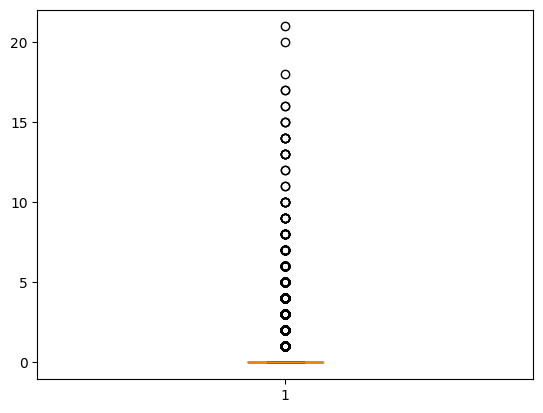

In [ ]:
# Persebaran kolom adr
plt.boxplot(df['booking_changes'])

kalo gadipake samsek mending biarin ajaa.

In [ ]:
dfx = df.copy()

In [ ]:
# Rumusnya
#q1 = df[col].quantile(0.25)
#q3 = df[col].quantile(0.75)

#iqr = q3 - q1
#lower_bound = q1 - 1.5*iqr
#upper_bound = q3 + 1.5*iqr

#outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

#percent_outliers = (len(outliers)/len(df))*100
#results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

##### 1st Handling

In [ ]:
# Handling Outlier untuk kolom adults
outlier1 = 'adults'

outlier_1 = dfx[(dfx[outlier1] < (dfx[outlier1].quantile(0.25)) - (1.5*(dfx[outlier1].quantile(0.75)-dfx[outlier1].quantile(0.25)))) |
          (dfx[outlier1] > (dfx[outlier1].quantile(0.75)) + (1.5*(dfx[outlier1].quantile(0.75)-dfx[outlier1].quantile(0.25))))	]

In [ ]:
# Lowerbound
(dfx[outlier1].quantile(0.25)) - (1.5*(dfx[outlier1].quantile(0.75)-dfx[outlier1].quantile(0.25)))

2.0

In [ ]:
# Upperbound
(dfx[outlier1].quantile(0.75)) + (1.5*(dfx[outlier1].quantile(0.75)-dfx[outlier1].quantile(0.25)))

2.0

In [ ]:
outlier_1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,Unknown,Unknown,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,Unknown,0,Transient,75.00,0,0,Check-Out,2015-07-02
20,Resort Hotel,0,37,2015,July,27,1,1,4,1,...,No Deposit,241.0,Unknown,0,Transient,97.29,0,1,Check-Out,2015-07-06
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,No Deposit,Unknown,Unknown,0,Transient,62.00,0,2,Check-Out,2015-07-15
34,Resort Hotel,1,45,2015,July,27,2,1,3,3,...,No Deposit,241.0,Unknown,0,Transient,108.80,0,1,Canceled,2015-05-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119372,City Hotel,0,175,2017,August,35,31,1,3,1,...,No Deposit,42.0,Unknown,0,Transient,82.35,0,1,Check-Out,2017-09-04
119373,City Hotel,0,175,2017,August,35,31,1,3,1,...,No Deposit,42.0,Unknown,0,Transient,82.35,0,1,Check-Out,2017-09-04
119376,City Hotel,0,165,2017,August,35,29,1,5,3,...,No Deposit,9.0,Unknown,0,Transient,209.25,0,3,Check-Out,2017-09-04
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,Unknown,0,Transient,209.00,0,0,Check-Out,2017-09-05


In [ ]:
# Data dikurangi Outlier adults
dfx1 = pd.merge(dfx,outlier_1, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [ ]:
dfx1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,Unknown,Unknown,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,Unknown,Unknown,0,Transient,0.00,0,0,Check-Out,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,Unknown,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,Unknown,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,Unknown,Unknown,0,Transient,107.00,0,0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287086,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,Unknown,0,Transient,96.14,0,2,Check-Out,2017-09-06
287087,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,Unknown,0,Transient,96.14,0,0,Check-Out,2017-09-06
287089,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,Unknown,0,Transient,157.71,0,4,Check-Out,2017-09-07
287090,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,Unknown,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
dfx1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,89680.000000,89680.000000,89680.000000,89680.000000,89680.000000,89680.000000,89680.000000,89680.0,89680.000000,89680.000000,89680.000000,89680.000000,89680.000000,89680.000000,89680.000000,89680.000000,89680.000000,89680.000000
mean,0.393153,114.223194,2016.150781,27.406345,15.776963,0.983541,2.605341,2.0,0.120183,0.010158,0.016035,0.093956,0.029471,0.185058,2.494503,103.158238,0.063916,0.609144
std,0.488453,110.285842,0.712148,13.270055,8.842473,1.001285,1.906935,0.0,0.428090,0.106740,0.125610,0.949642,0.483438,0.608657,19.060472,49.568262,0.248405,0.802763
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,26.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,81.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,174.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,2.0,10.000000,10.000000,1.000000,26.000000,31.000000,18.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# List untuk menyimpan hasil
results = []

cols = dfx1.select_dtypes(include=['float64', 'int64'])

for col in cols:
    q1 = dfx1[col].quantile(0.25)
    q3 = dfx1[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = dfx1[(dfx1[col] < lower_bound) | (dfx1[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(dfx1))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
is_canceled,0.000000
lead_time,2.167707
arrival_date_year,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.215210
stays_in_week_nights,3.036351
adults,0.000000
children,8.250446
babies,0.989072


##### 2nd Handling

In [ ]:
# Handling Outlier untuk Kolom bookiung Changes
outlier2 = 'booking_changes'
outlier_2 = dfx1[(dfx1[outlier2] < (dfx1[outlier2].quantile(0.25)) - (1.5*(dfx1[outlier2].quantile(0.75)-dfx1[outlier2].quantile(0.25)))) |
          (dfx1[outlier2] > (dfx1[outlier2].quantile(0.75)) + (1.5*(dfx1[outlier2].quantile(0.75)-dfx1[outlier2].quantile(0.25))))	]

In [ ]:
# Lower Bound
(dfx1[outlier2].quantile(0.25)) - (1.5*(dfx1[outlier2].quantile(0.75)-dfx1[outlier2].quantile(0.25)))

0.0

In [ ]:
# Upper Bound
(dfx[outlier1].quantile(0.75)) + (1.5*(dfx[outlier1].quantile(0.75)-dfx[outlier1].quantile(0.25)))

2.0

In [ ]:
outlier_2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,Unknown,Unknown,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,Unknown,Unknown,0,Transient,0.00,0,0,Check-Out,2015-07-01
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,...,No Deposit,241.0,Unknown,0,Transient,154.77,0,1,Check-Out,2015-07-05
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,Unknown,0,Transient,84.67,0,1,Check-Out,2015-07-07
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,Unknown,0,Transient,84.67,0,1,Check-Out,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287047,City Hotel,0,110,2017,August,35,29,0,5,2,...,No Deposit,14.0,Unknown,0,Transient,171.00,0,2,Check-Out,2017-09-03
287056,City Hotel,0,111,2017,August,35,29,1,5,2,...,No Deposit,14.0,Unknown,0,Transient,135.00,0,1,Check-Out,2017-09-04
287059,City Hotel,0,63,2017,August,35,31,1,3,2,...,No Deposit,9.0,Unknown,0,Transient,133.50,0,1,Check-Out,2017-09-04
287062,City Hotel,0,198,2017,August,35,29,1,5,2,...,No Deposit,9.0,Unknown,0,Transient,119.17,0,2,Check-Out,2017-09-04


In [ ]:
# Data dikurangi Outlier Penjualan
dfx2 = pd.merge(dfx1,outlier_2, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [ ]:
dfx2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,Unknown,0,Transient,98.00,0,1,Check-Out,2015-07-03
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,Unknown,0,Transient,98.00,0,1,Check-Out,2015-07-03
4,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,Unknown,Unknown,0,Transient,107.00,0,0,Check-Out,2015-07-03
5,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,Unknown,0,Transient,103.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,Unknown,0,Transient,82.00,0,1,Canceled,2015-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95211,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,Unknown,0,Transient,96.14,0,2,Check-Out,2017-09-06
95212,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,Unknown,0,Transient,96.14,0,0,Check-Out,2017-09-06
95213,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,Unknown,0,Transient,157.71,0,4,Check-Out,2017-09-07
95214,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,Unknown,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# List untuk menyimpan hasil
results = []

cols = dfx2.select_dtypes(include=['float64', 'int64'])

for col in cols:
    q1 = dfx2[col].quantile(0.25)
    q3 = dfx2[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = dfx2[(dfx2[col] < lower_bound) | (dfx2[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(dfx2))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
is_canceled,0.000000
lead_time,2.314332
arrival_date_year,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.201136
stays_in_week_nights,2.804440
adults,0.000000
children,7.201416
babies,0.421366


##### Comparing before and after Handling Outlier

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
dfx2.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,78554.000000,78554.000000,78554.000000,78554.000000,78554.000000,78554.000000,78554.000000,78554.0,78554.000000,78554.000000,78554.000000,78554.000000,78554.000000,78554.0,78554.000000,78554.000000,78554.000000,78554.000000
mean,0.422601,115.555007,2016.141610,27.364412,15.752858,0.962446,2.550793,2.0,0.106793,0.004265,0.014767,0.105723,0.024429,0.0,2.682651,102.019411,0.054841,0.581625
std,0.493976,111.523798,0.715716,13.242160,8.835996,0.988684,1.859685,0.0,0.407514,0.065942,0.120619,1.012109,0.444695,0.0,19.640222,44.709843,0.228676,0.784455
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,72.000000,0.000000,0.000000
50%,0.000000,81.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,95.000000,0.000000,0.000000
75%,1.000000,175.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,123.300000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,2.0,3.000000,2.000000,1.000000,26.000000,25.000000,0.0,391.000000,508.000000,3.000000,5.000000


In [ ]:
df1.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Unnamed: 32
count,87391,87391,87391,87391,87391,87391,87391,87391,87391,87391,...,75200.0,5259.0,87391,87391,87391,87391,87391,87391,87391,87391
unique,2,4,868,6,12,106,62,30,59,19,...,448.0,481.0,148,4,8875,8,12,3,926,793
top,City Hotel,0,0,2016,August,33,17,0,1,2,...,9.0,40.0,0,Transient,0.00,0,0,Check-Out,2016-02-14,29/April/2017
freq,53424,54927,4647,36496,11253,2136,2466,29586,18729,51797,...,28753.0,851.0,70218,71986,1778,65442,34810,63371,211,237


In [ ]:
df2 = dfx2.copy()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0748dc2a10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0701e80370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0748dc1f90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0701e806d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0701e80cd0>],
 'means': []}

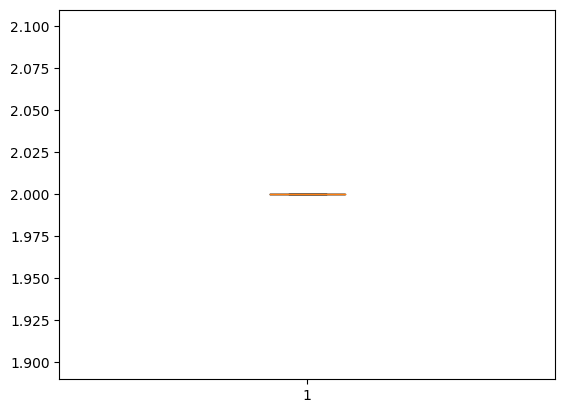

In [ ]:
plt.boxplot(df2['adults'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0701f0c850>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0701f0cd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0701f0c5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0701f0d2d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0701f0d570>],
 'means': []}

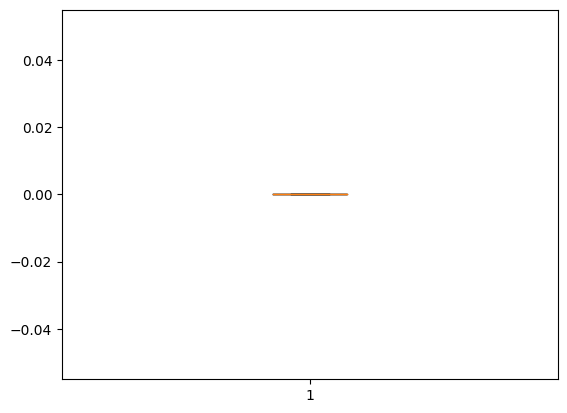

In [ ]:
plt.boxplot(df2['booking_changes'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0701cbae60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0701cbb3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0701cbabc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0701cbb8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0701cbbb80>],
 'means': []}

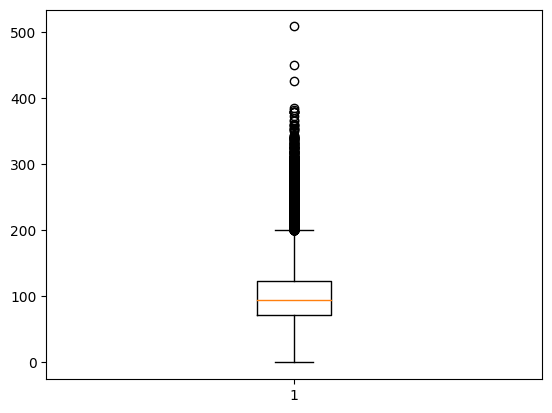

In [ ]:
plt.boxplot(df2['adr'])

Yang minus diapus sama yang 5400

### Handling Outlier Versi Ka Reishi

In [ ]:
dfz = df.copy()

#### 1st Handling

In [ ]:
# Pilih Kolom Outlier
Outlier1 = 'adults'

# Rumus Outlier
q1 = dfz[Outlier1].quantile(0.25)
q3 = dfz[Outlier1].quantile(0.75)

iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers_1 = dfz[(dfz[Outlier1] < lower_bound) | (dfz[Outlier1] > upper_bound)]

# Preview
print('Banyaknya outlier', outliers_1.shape)
print('Lower bound = ', lower_bound)
print('Upper bound = ', upper_bound)
print('IQR = ', iqr)
print('Q3 = ', q3)
print('Q1 = ', q1)





Banyaknya outlier (29710, 32)
Lower bound =  2.0
Upper bound =  2.0
IQR =  0.0
Q3 =  2.0
Q1 =  2.0


In [ ]:
# Removing Outlier from Dataset
dfz1 = pd.merge(dfz,outliers_1, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

print('Jumlah data sebelum Removing Outlier =', dfz.shape)
print('Jumlah Data setelah Removing Outlier = ', dfz1.shape)

Jumlah data sebelum Removing Outlier = (119390, 32)
Jumlah Data setelah Removing Outlier =  (89680, 32)


In [ ]:
# List untuk menyimpan hasil
results = []

cols = dfz1.select_dtypes(include=['float64', 'int64'])

for col in cols:
    q1 = dfz1[col].quantile(0.25)
    q3 = dfz1[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = dfz1[(dfz1[col] < lower_bound) | (dfz1[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(dfz1))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
is_canceled,0.000000
lead_time,2.167707
arrival_date_year,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.215210
stays_in_week_nights,3.036351
adults,0.000000
children,8.250446
babies,0.989072


#### 2nd Handling

In [ ]:
# Pilih Kolom Outlier
Outlier2 = 'booking_changes'

# Rumus Outlier
q1 = dfz1[Outlier2].quantile(0.25)
q3 = dfz1[Outlier2].quantile(0.75)

iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers_2 = dfz1[(dfz1[Outlier2] < lower_bound) | (dfz1[Outlier2] > upper_bound)]

# Preview
print('Banyaknya outlier', outliers_2.shape)
print('Lower bound = ', lower_bound)
print('Upper bound = ', upper_bound)
print('IQR = ', iqr)
print('Q3 = ', q3)
print('Q1 = ', q1)

Banyaknya outlier (11126, 32)
Lower bound =  0.0
Upper bound =  0.0
IQR =  0.0
Q3 =  0.0
Q1 =  0.0


In [ ]:
# Removing Outlier from Dataset
dfz2 = pd.merge(dfz1,outliers_2, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

print('Jumlah data sebelum Removing Outlier =', dfz1.shape)
print('Jumlah Data setelah Removing Outlier = ', dfz2.shape)

Jumlah data sebelum Removing Outlier = (89680, 32)
Jumlah Data setelah Removing Outlier =  (78554, 32)


In [ ]:
# List untuk menyimpan hasil
results = []

cols = dfz2.select_dtypes(include=['float64', 'int64'])

for col in cols:
    q1 = dfz2[col].quantile(0.25)
    q3 = dfz2[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = dfz2[(dfz2[col] < lower_bound) | (dfz2[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(dfz2))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
is_canceled,0.000000
lead_time,2.314332
arrival_date_year,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.201136
stays_in_week_nights,2.804440
adults,0.000000
children,7.201416
babies,0.421366


### Custom Handling Outlier

- Kolom Adults dan Adr di handling. Adults dibawah 10, adr minus diapus sama yang 5400. mereka anehnya sebanding

In [ ]:
# Handling Outlier using custom limit
dfy2 = df[((df['adults'] < 10) &(df['adults'] > 0) ) &
          ((df['adr'] < 5400) & (df['adr'] > 0)) 	]

In [ ]:
dfy2.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000
mean,0.374873,105.052671,2016.160120,27.137505,15.800932,0.935988,2.520340,1.864568,0.100972,0.007860,0.027906,0.087113,0.125498,0.215564,2.342905,103.534202,0.062723,0.570152
std,0.484092,106.929249,0.706869,13.572691,8.783487,0.994759,1.890727,0.474946,0.391291,0.097141,0.164703,0.849569,1.447489,0.630475,17.695496,46.713471,0.245717,0.791169
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.000000,0.000000
25%,0.000000,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.530000,0.000000,0.000000
50%,0.000000,71.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,162.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,709.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,510.000000,8.000000,5.000000


In [ ]:
# List untuk menyimpan hasil
results = []

cols = dfy2.select_dtypes(include=['float64', 'int64'])

for col in cols:
    q1 = dfy2[col].quantile(0.25)
    q3 = dfy2[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = dfy2[(dfy2[col] < lower_bound) | (dfy2[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(dfy2))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
is_canceled,0.000000
lead_time,2.525153
arrival_date_year,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.216759
stays_in_week_nights,2.824690
adults,24.237718
children,7.066845
babies,0.758655


{'whiskers': [<matplotlib.lines.Line2D at 0x7b3f7fe625c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b3f7fe62b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b3f7fe62320>],
 'medians': [<matplotlib.lines.Line2D at 0x7b3f7fe63040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b3f7fe632e0>],
 'means': []}

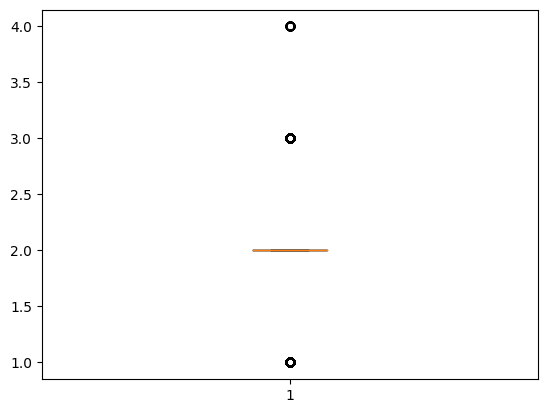

In [ ]:
plt.boxplot(dfy2['adults'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7b3f7fcd1e10>,
 'caps': [<matplotlib.lines.Line2D at 0x7b3f7fcd2350>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b3f7fcd1b70>],
 'medians': [<matplotlib.lines.Line2D at 0x7b3f7fcd2890>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b3f7fcd2b30>],
 'means': []}

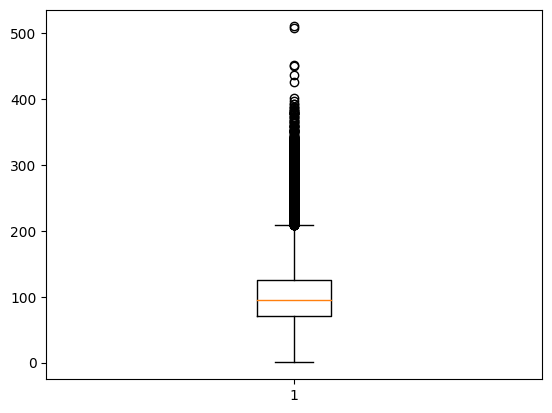

In [ ]:
plt.boxplot(dfy2['adr'])

### Saving to new Dataset

In [ ]:
df2 = dfz2.copy()

In [ ]:
df2 = dfy2.copy()

In [ ]:
# Save the dataframe to a CSV file
df2.to_csv('Hotel_booking_Cleaned_by_laglag.csv', index=False)

### EDA (Exploratory Data Analysis)

In [ ]:
df2.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,78554.000000,78554.000000,78554.000000,78554.000000,78554.000000,78554.000000,78554.000000,78554.0,78554.000000,78554.000000,78554.000000,78554.000000,78554.000000,78554.0,78554.000000,78554.000000,78554.000000,78554.000000
mean,0.422601,115.555007,2016.141610,27.364412,15.752858,0.962446,2.550793,2.0,0.106793,0.004265,0.014767,0.105723,0.024429,0.0,2.682651,102.019411,0.054841,0.581625
std,0.493976,111.523798,0.715716,13.242160,8.835996,0.988684,1.859685,0.0,0.407514,0.065942,0.120619,1.012109,0.444695,0.0,19.640222,44.709843,0.228676,0.784455
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,72.000000,0.000000,0.000000
50%,0.000000,81.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,95.000000,0.000000,0.000000
75%,1.000000,175.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,123.300000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,2.0,3.000000,2.000000,1.000000,26.000000,25.000000,0.0,391.000000,508.000000,3.000000,5.000000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78554 entries, 2 to 95215
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           78554 non-null  object 
 1   is_canceled                     78554 non-null  int64  
 2   lead_time                       78554 non-null  int64  
 3   arrival_date_year               78554 non-null  int64  
 4   arrival_date_month              78554 non-null  object 
 5   arrival_date_week_number        78554 non-null  int64  
 6   arrival_date_day_of_month       78554 non-null  int64  
 7   stays_in_weekend_nights         78554 non-null  int64  
 8   stays_in_week_nights            78554 non-null  int64  
 9   adults                          78554 non-null  int64  
 10  children                        78554 non-null  float64
 11  babies                          78554 non-null  int64  
 12  meal                            

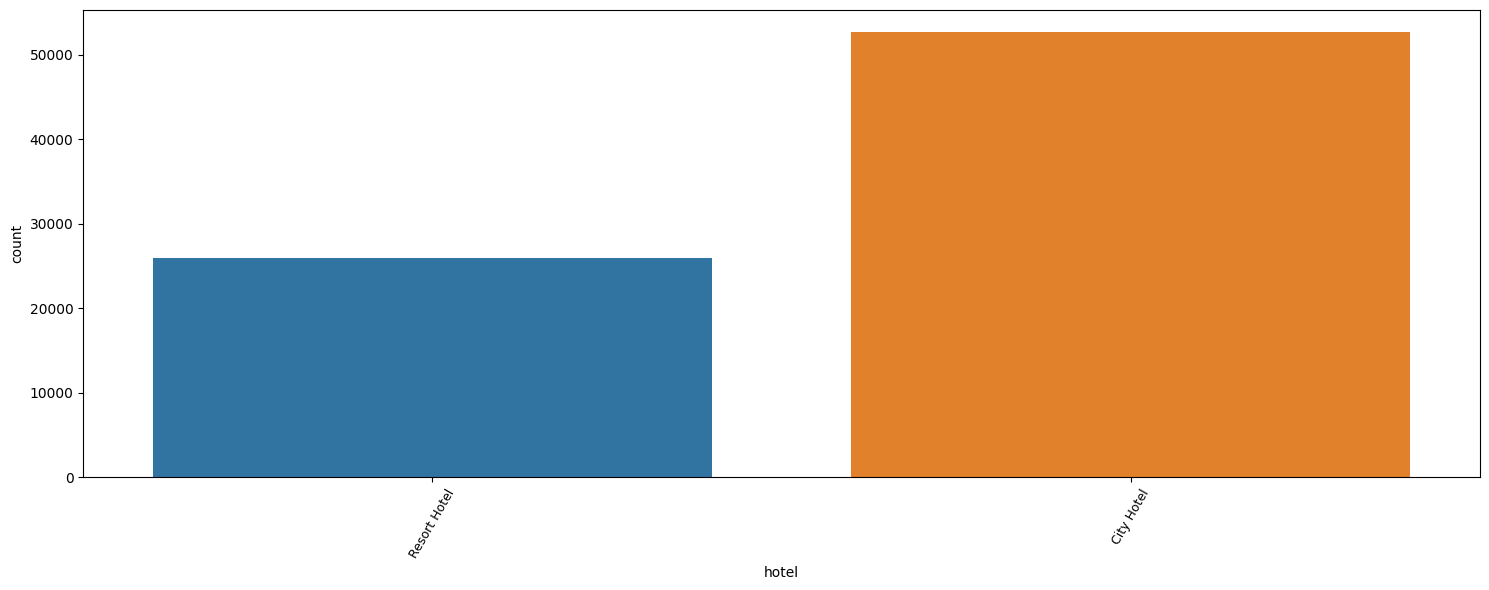

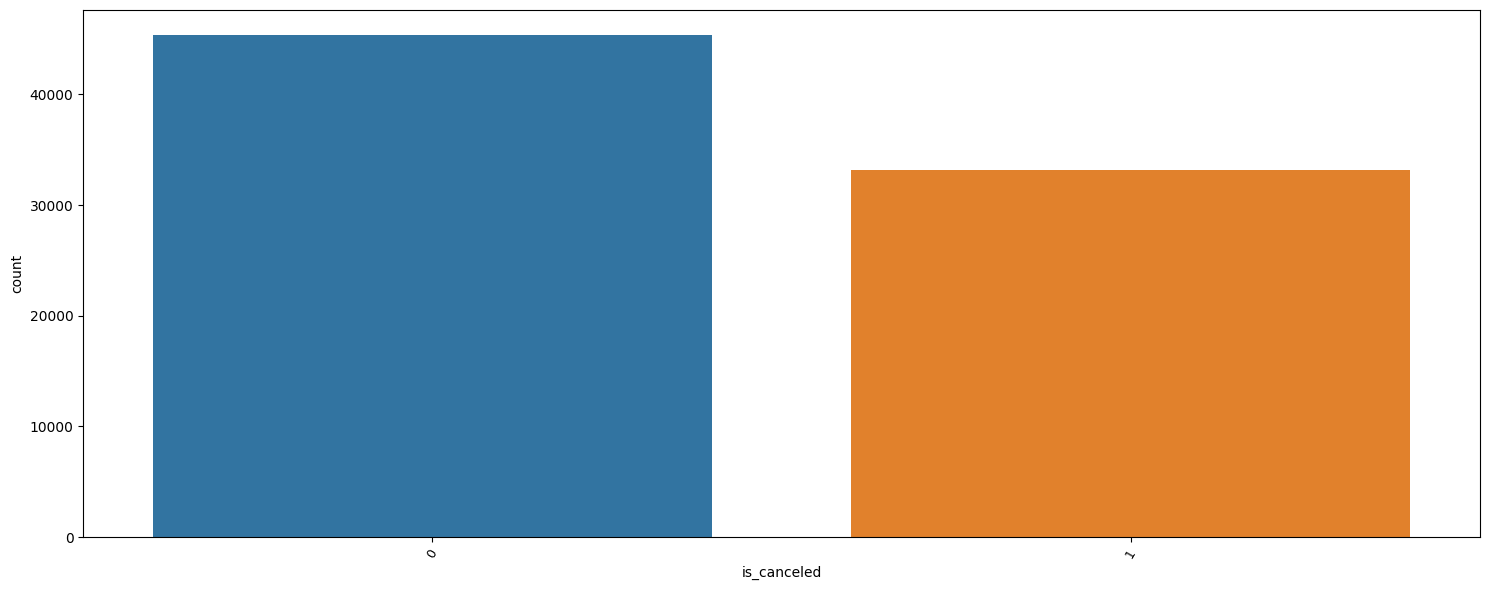

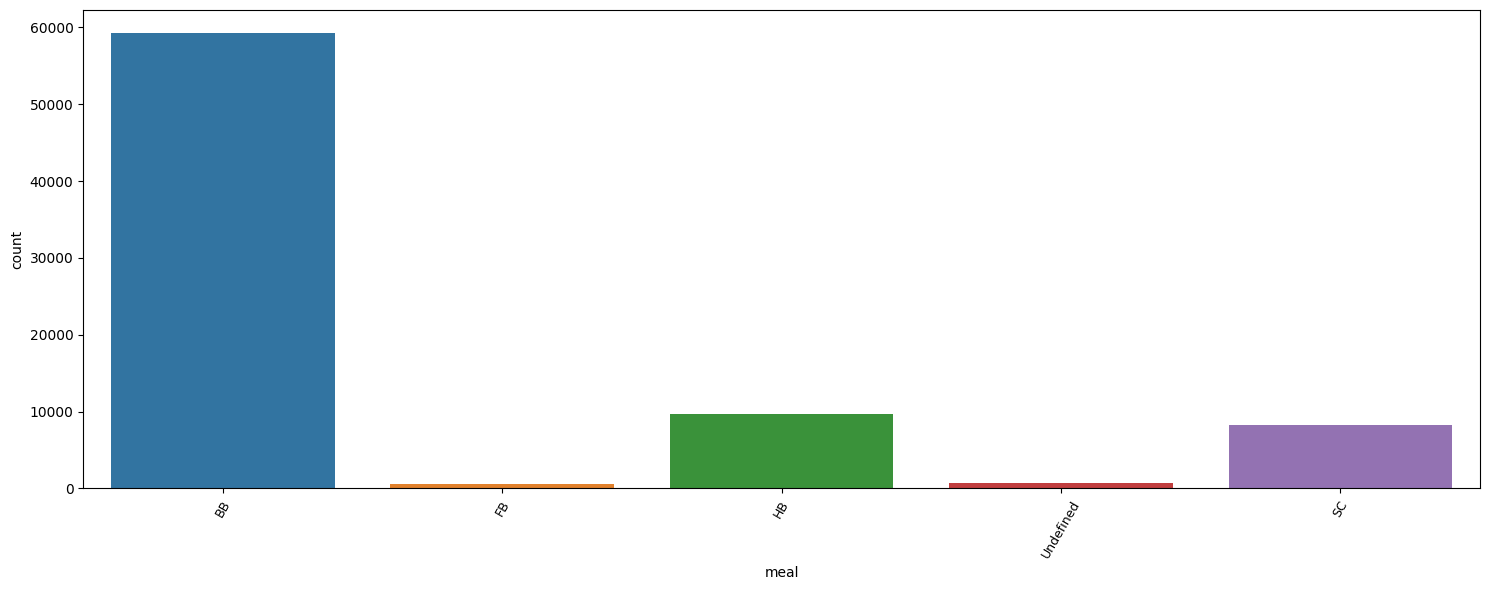

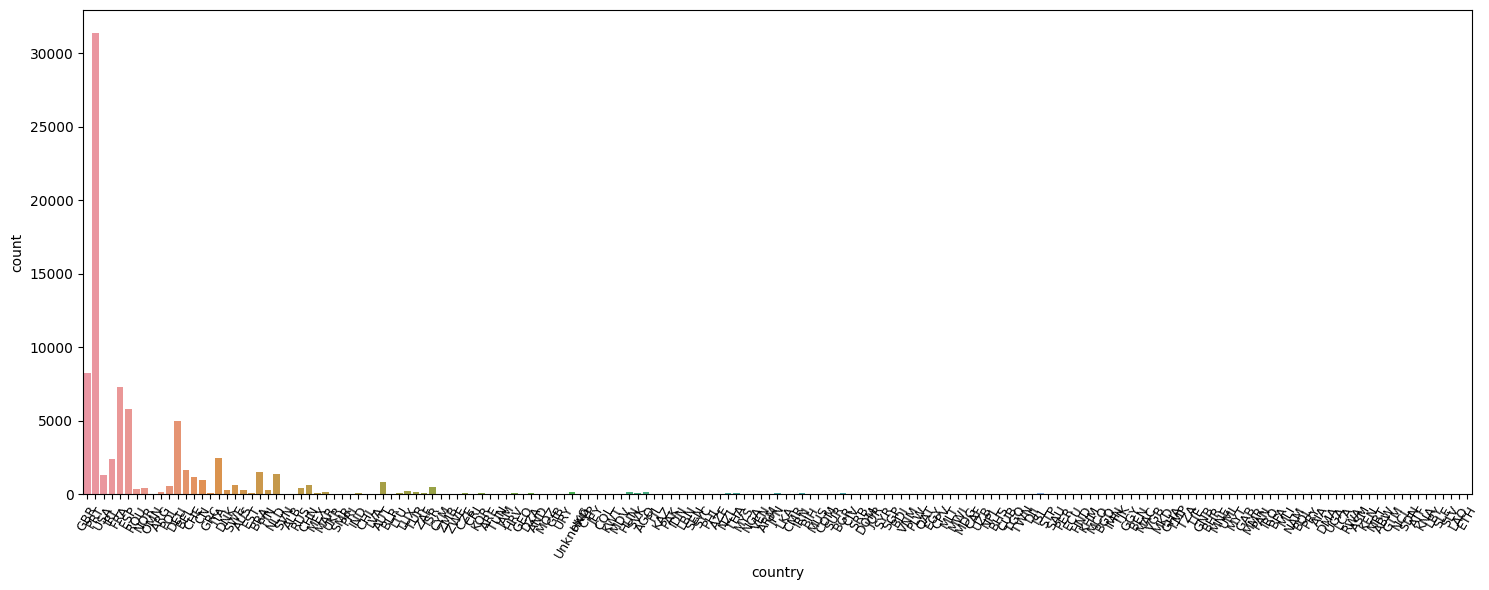

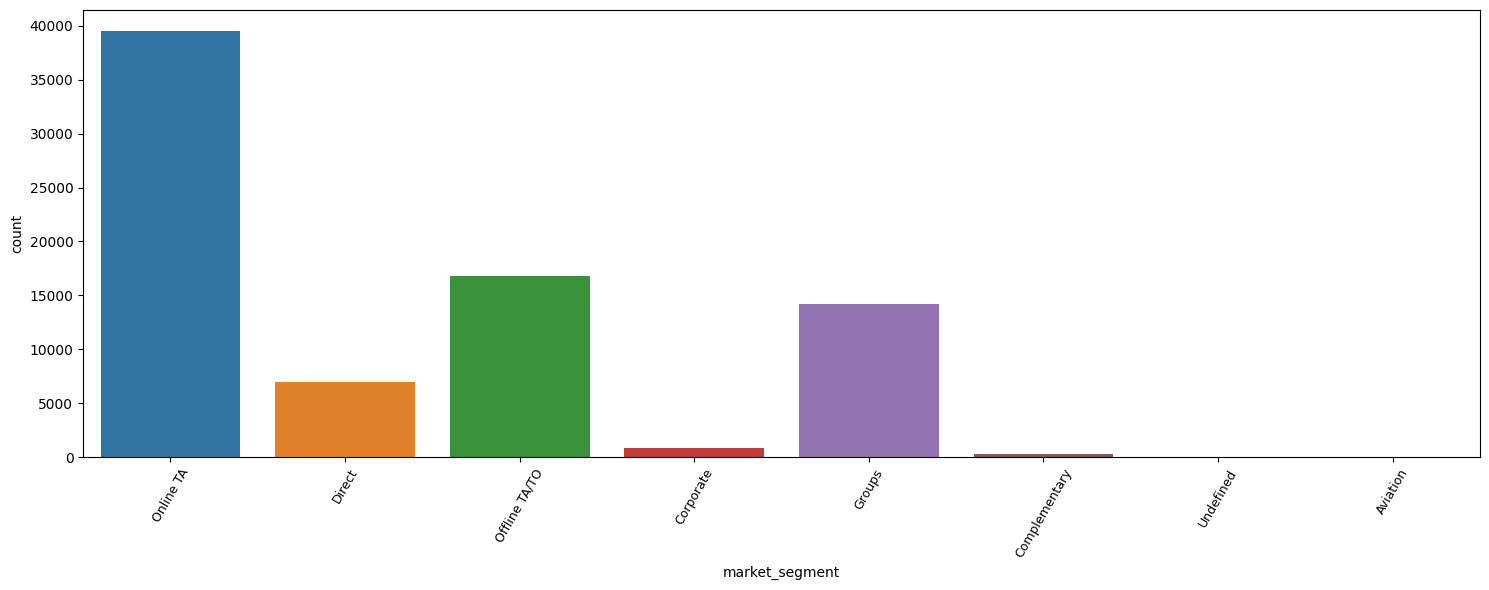

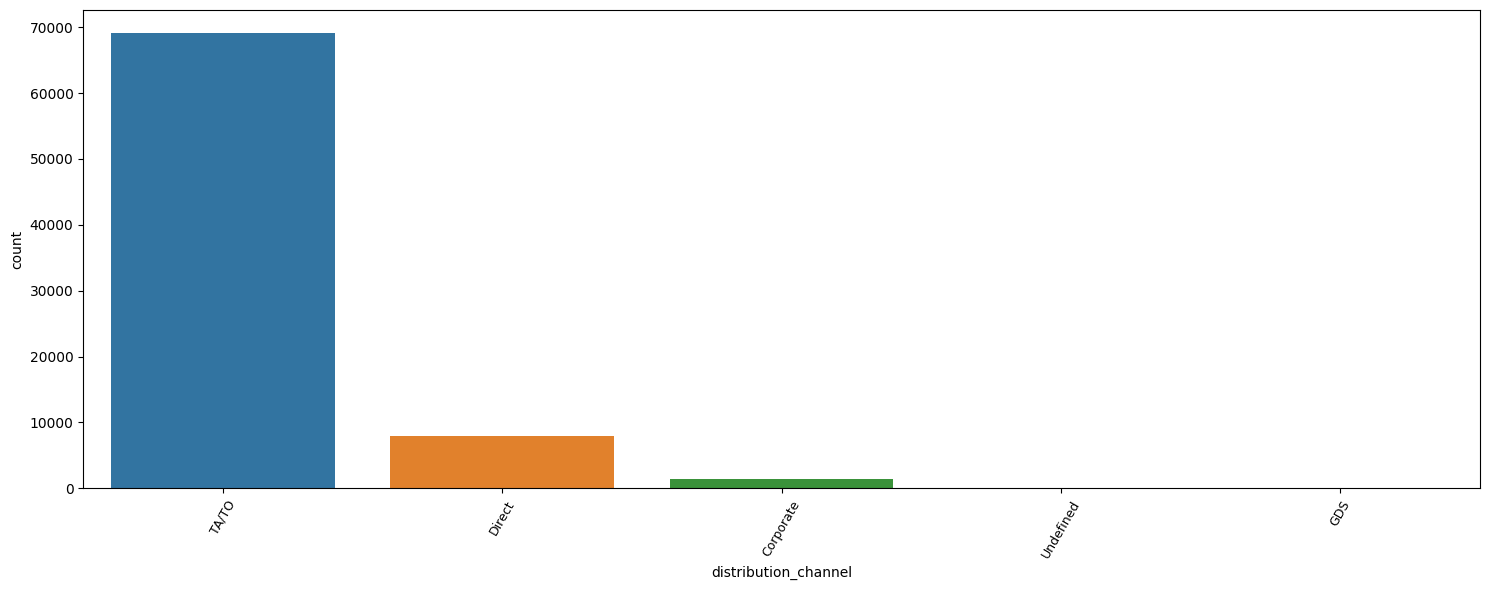

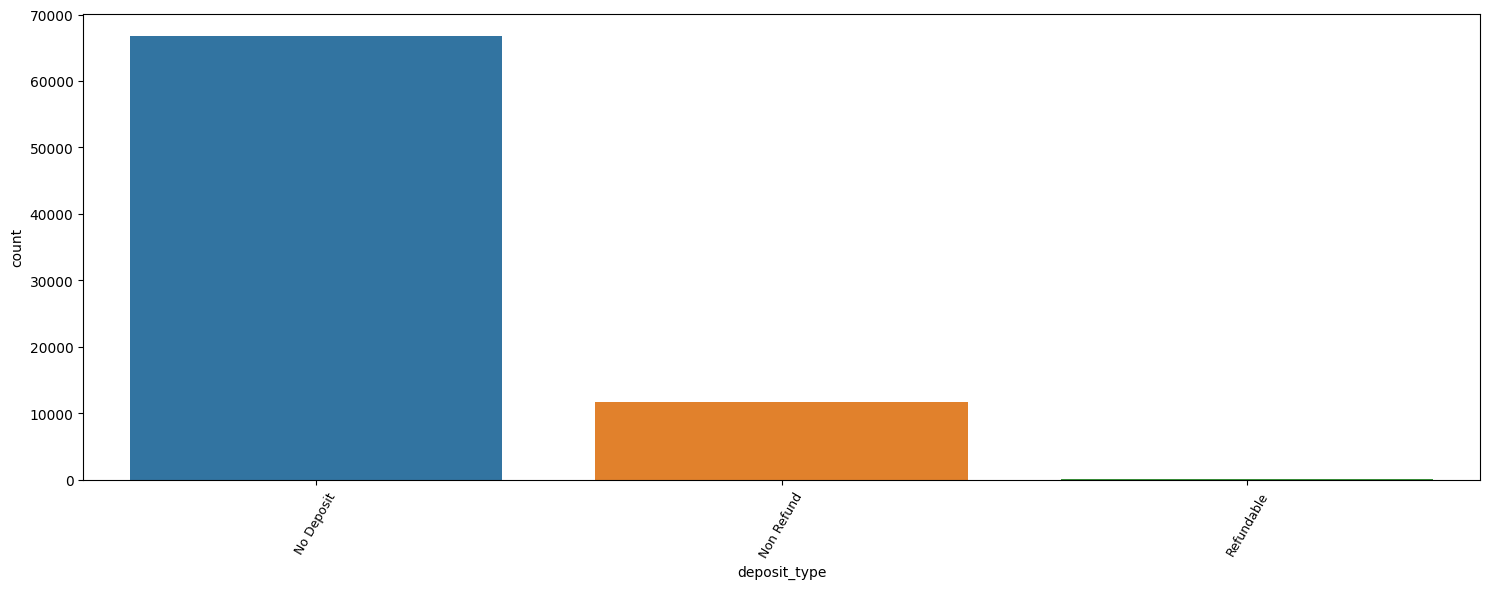

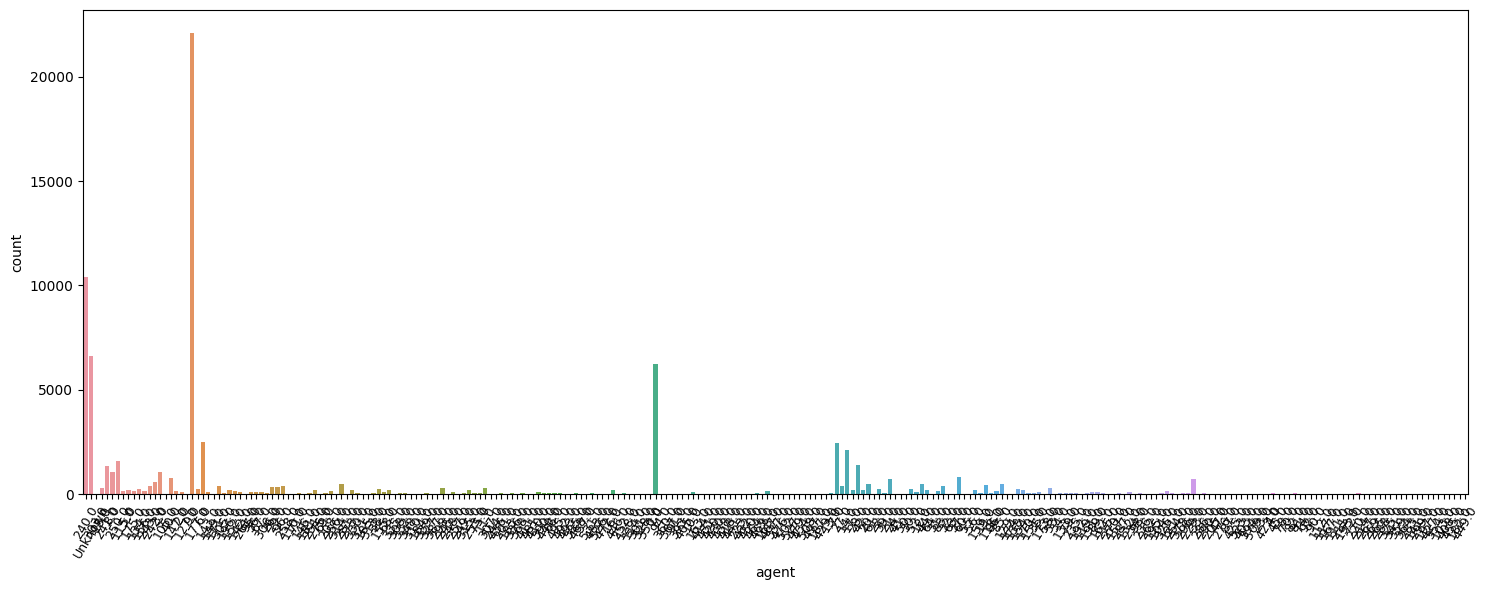

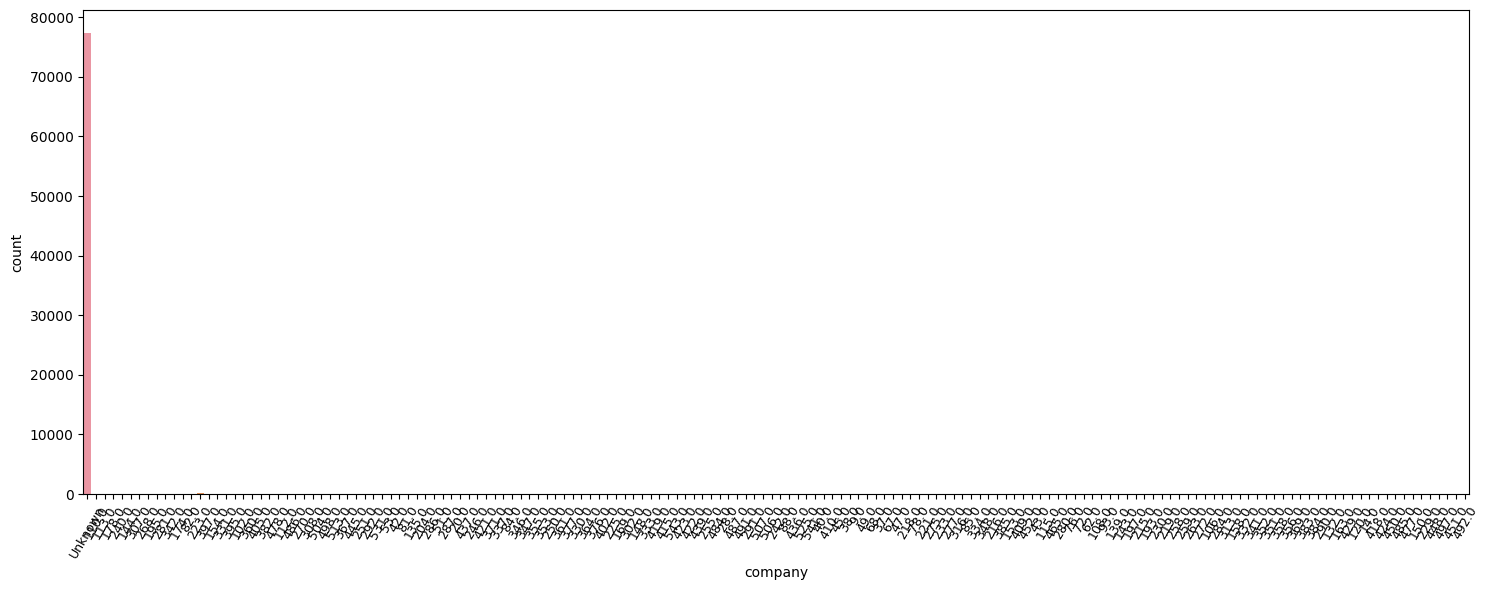

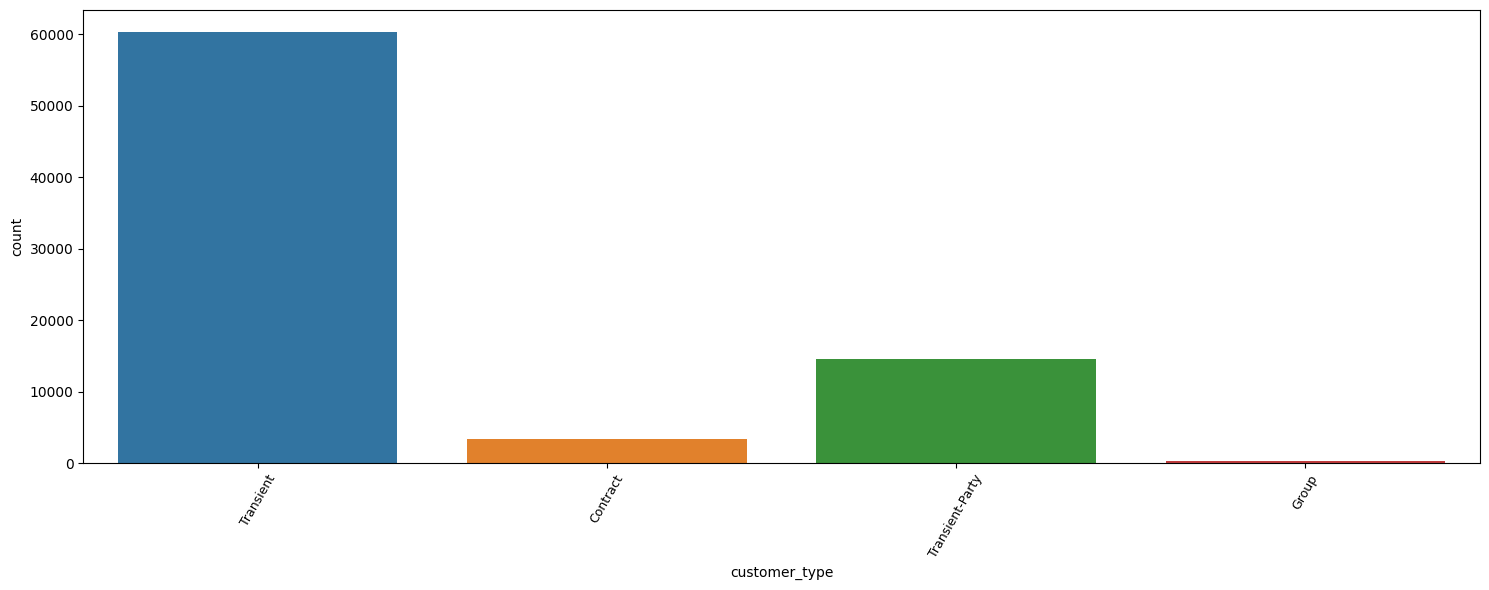

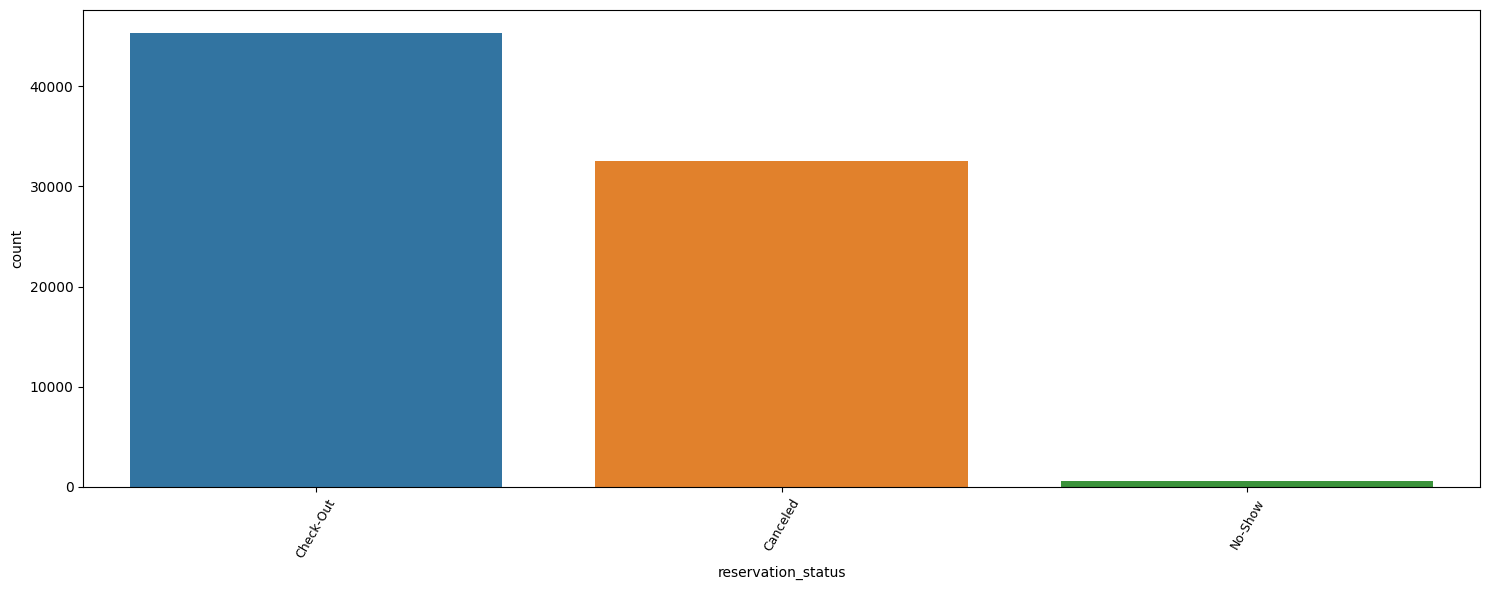

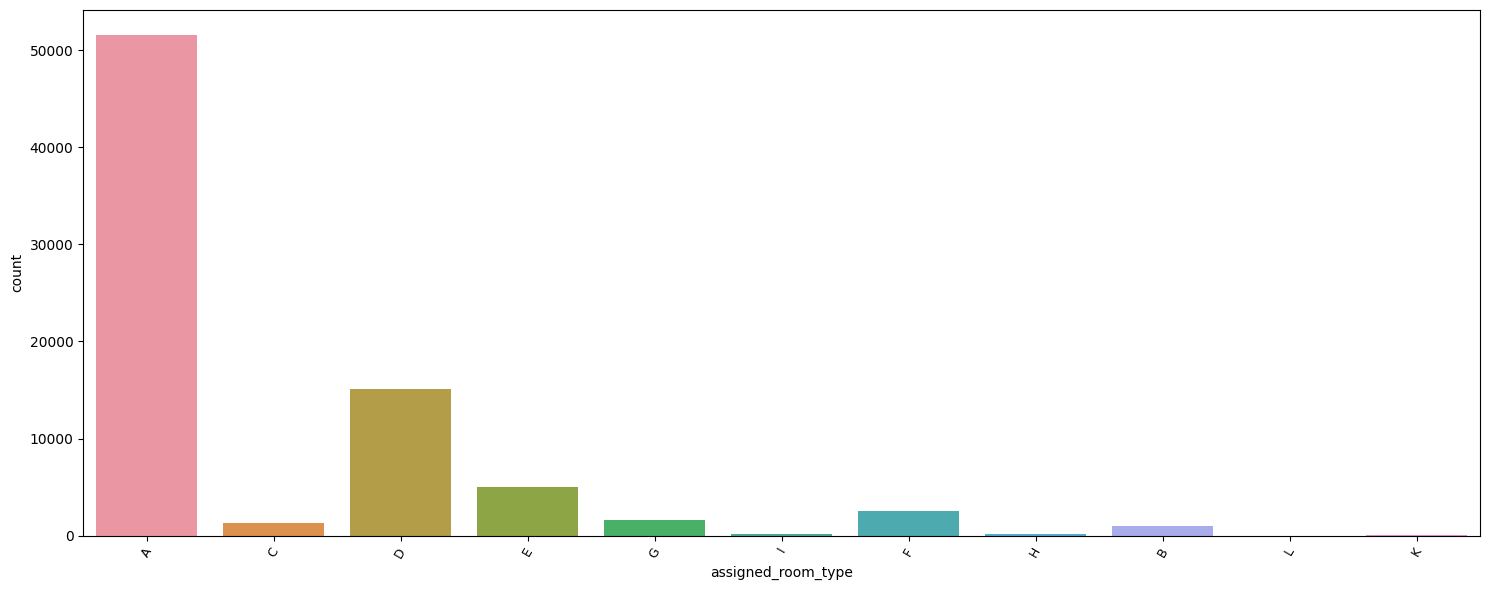

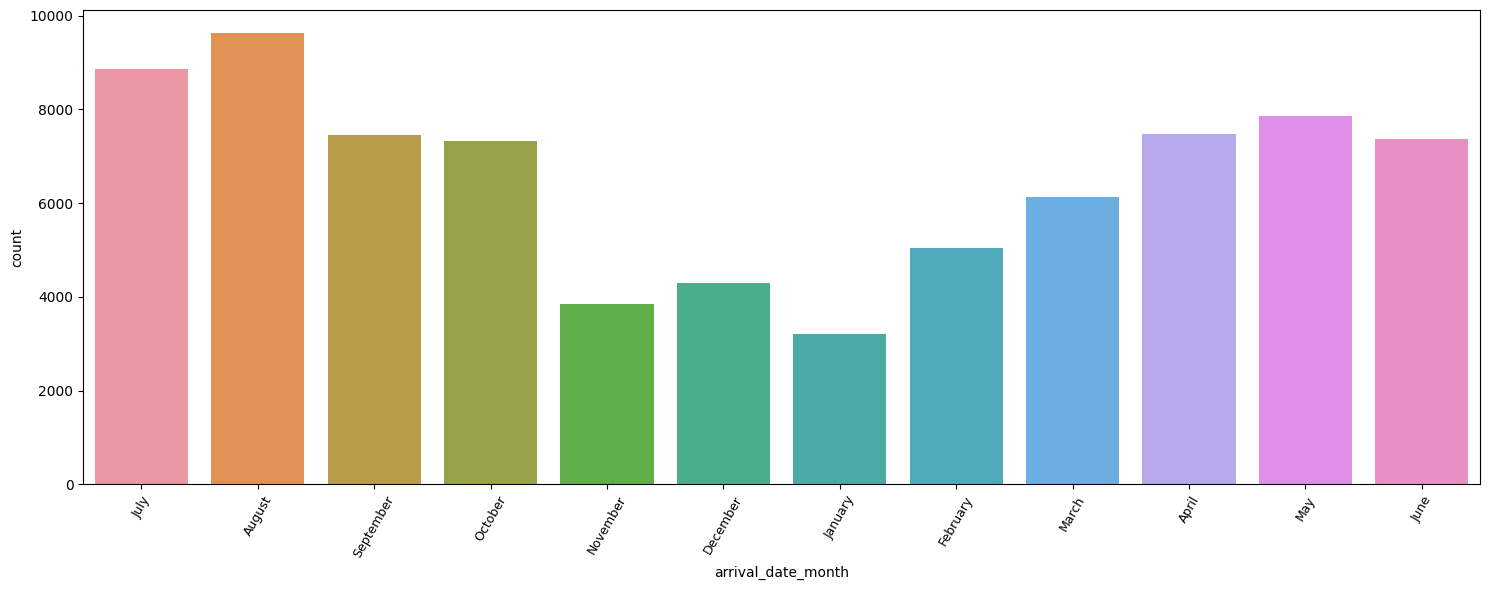

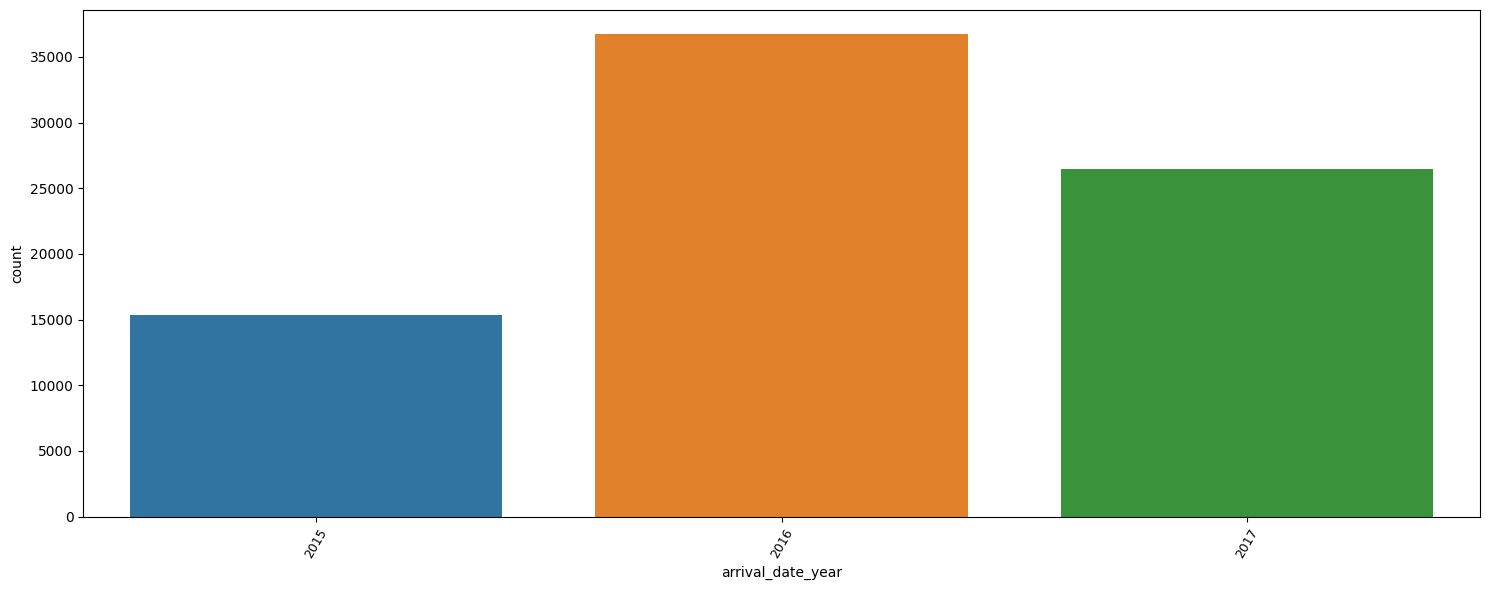

In [ ]:
# Melihat perbandingan data kategori disetiap kolom

# Kolom kategori yang ingin dilihat :
categorical = ['hotel', 'is_canceled', 'meal', 'country', 'market_segment', 'distribution_channel',
               'deposit_type', 'agent', 'company', 'customer_type', 'reservation_status', 'assigned_room_type',
               'arrival_date_month', 'arrival_date_year' ]

for col in categorical:
    plt.figure(figsize=(15,6))
    plt.xticks(fontsize=9, rotation=60)
    sns.countplot(x=col, data=df2)
    plt.tight_layout()

Insight :

Dari bar chart di atas, kita bisa lihat bahwa pelanggan terbanyak ada pada konsumer tunggal. Kemudian produk terbanyak yang dibeli adalah produk kebutuhan kantor. Lalu metode pengirimian paling banyak ada pada di standard class.

reservation_status,Canceled,Check-Out,No-Show
hotel,,,
City Hotel,24205,27989,439
Resort Hotel,8374,17368,179


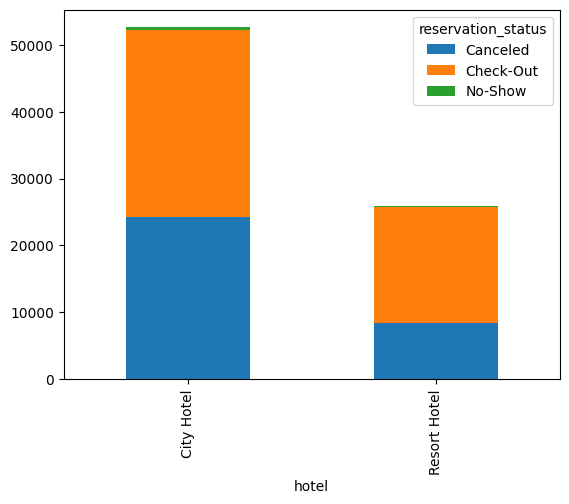

In [ ]:
# Mengetahui seberapa banyak pembatalan untuk tiap jenis hotel
df2.groupby(['hotel', 'reservation_status']).size().unstack().plot(kind='bar', stacked=True)
pd.crosstab(df2['hotel'],df2['reservation_status'])

hotel,City Hotel,Resort Hotel
assigned_room_type,,
A,40500,11066
B,861,88
C,87,1166
D,8338,6807
E,968,4035
F,1417,1135
G,357,1265
H,0,187
I,0,171


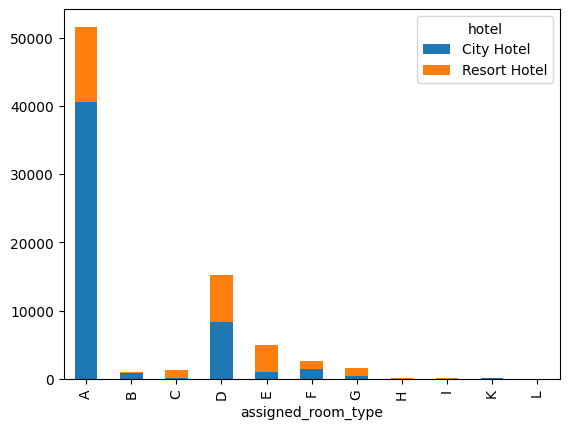

In [ ]:
# Mengetahui room type yang sering dipesan untuk tiap jenis hotel
df2.groupby(['assigned_room_type', 'hotel']).size().unstack().plot(kind='bar', stacked=True)
pd.crosstab(df2['assigned_room_type'],df2['hotel'])

hotel,City Hotel,Resort Hotel
distribution_channel,,
Corporate,635,775
Direct,3735,4250
GDS,13,0
TA/TO,48247,20895
Undefined,3,1


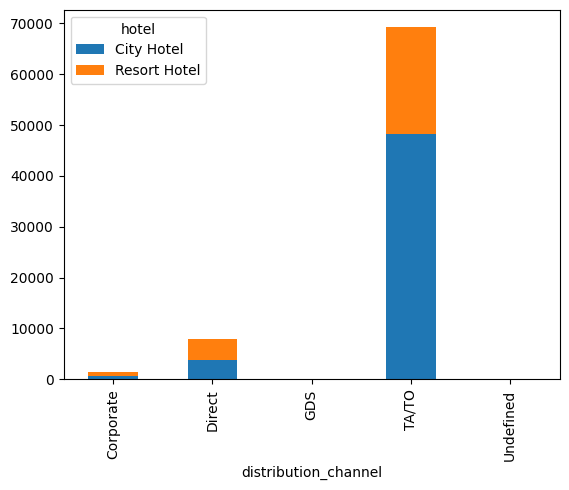

In [ ]:
# Mengetahui Distribution Channel terbanyak berasarkan jenis hotel
df2.groupby(['distribution_channel', 'hotel']).size().unstack().plot(kind='bar', stacked=True)
pd.crosstab(df2['distribution_channel'],df2['hotel'])

insight :

travel agent berpotensi jadi pemasukan yang banyak

Mari kita cari untuk per bulan

arrival_date_year,2015,2016,2017
arrival_date_month,,,
April,0,3642,3830
August,3018,3469,3154
December,1898,2395,0
February,0,2479,2569
January,0,1206,2009
July,2229,3046,3598
June,0,3435,3943
March,0,2986,3152
May,0,3637,4214


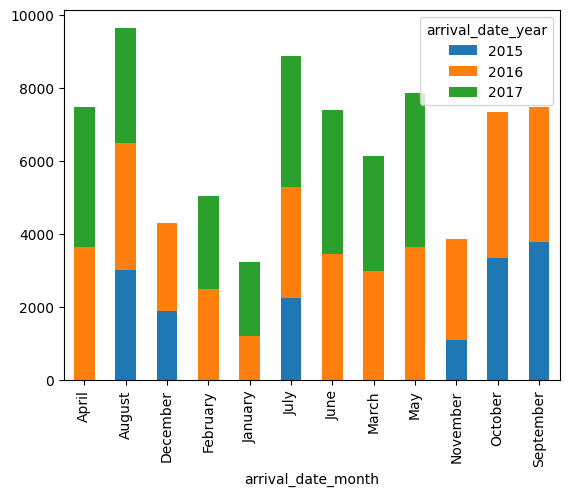

In [ ]:
# Jumlah pesanan per bulan dalam 3 tahun
df2.groupby(['arrival_date_month', 'arrival_date_year']).size().unstack().plot(kind='bar', stacked=True)
pd.crosstab(df2['arrival_date_month'],df2['arrival_date_year'])

ini ganti jadi berdasarkan reservation date aja

kalo time series biasanya linechart. jadiin 36 bulan untuk 3 tahun.




#### Mini Dashboard


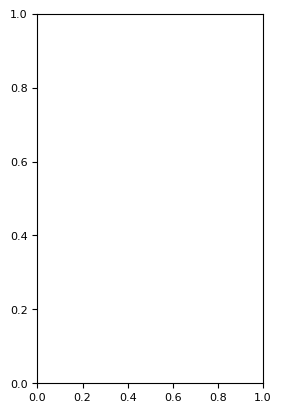

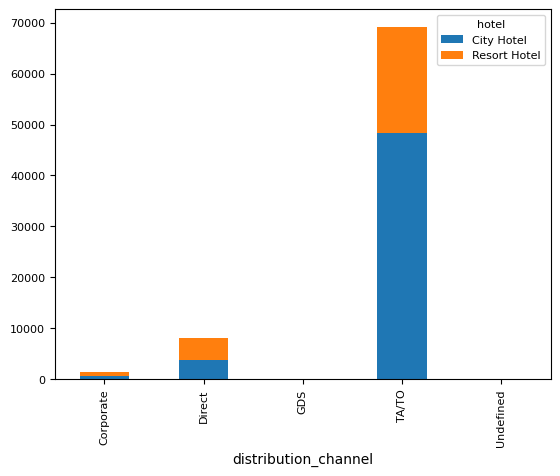

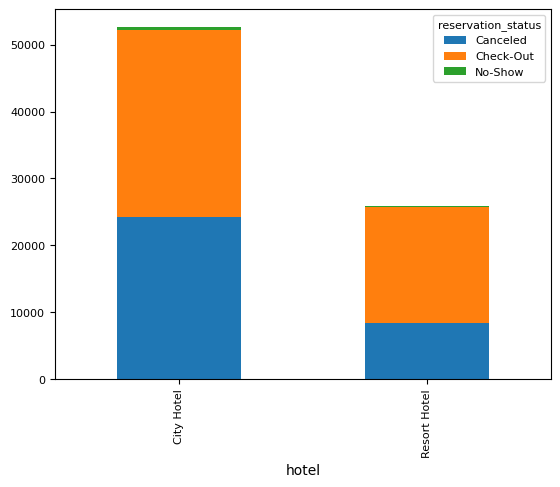

In [ ]:

# First axis
plt.subplot(1,2,2)
df2.groupby(['distribution_channel', 'hotel']).size().unstack().plot(kind='bar', stacked=True)
df2.groupby(['hotel', 'reservation_status']).size().unstack().plot(kind='bar', stacked=True)

plt.show()

# Second axis


#lt.subplot(2, 1, 1)
#df2.groupby(['hotel', 'reservation_status']).size().unstack().plot(kind='bar', stacked=True)
# Set figure's title


#plt.tight_layout()

# Save to PNG file
#plt.savefig('/content/client_dashboard.png')

#plt.show()


### Notes
- Kolom Adults dan Adr di handling. Adults dibawah 10, adr minus diapus sama yang 5400. mereka anehnya sebanding
- Kalo kaya date reservation, time series line chart. Cari gap dan penurunannya darimana
- Ganti Datenya pake Reservation Date
- Kolom Booking Changes gausa di handling outlier karena kayanya ga kepake




### EDA versi ka enji

In [ ]:
#Install pygwalker package
!pip install pygwalker -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 964.4/964.4 kB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.1/310.1 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.3 MB/s eta 0:00:00


In [ ]:
#Import Library
import pygwalker as pyg

In [ ]:
pyg.walk(df2)

INSIGHT:


### IDE

- try to make geospasial map?
- Stays in week sama non weekend digabung buat tau orang itu nginep berapa lama

##### Cross Correlation

<ipython-input-42-7cb4192de481>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), cmap = 'Wistia', annot = True)


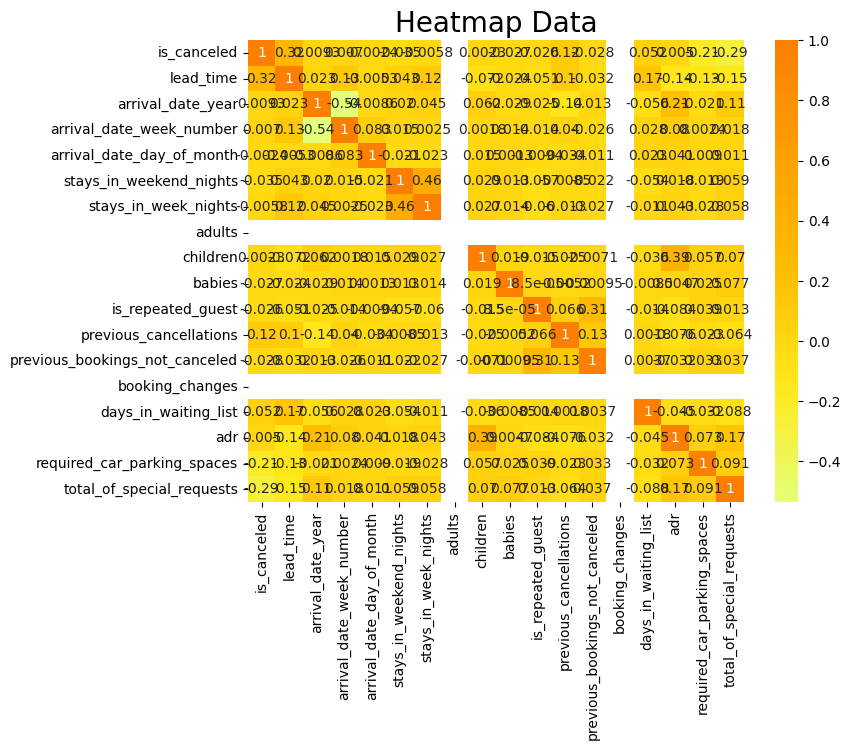

In [ ]:
# Korelasi
plt.figure(figsize=(8,6))
sns.heatmap(df2.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap Data', fontsize = 20)
plt.show()

Dari grafik heatmap korelasi di atas, kita mengetahui bahwa Kolom Penjualan dan Kolom Untung memiliki korelasi yang paling kuat jika dibandingnkan dengan korelasi kolom lain.

### FEATURE ENGINEERING

In [ ]:
#Melihat jumlah produk, jumlah transaksi, dan pelanggan
cust_x_prod = pd.DataFrame([{'products':len(df2['ID_produk'].value_counts()),
'transactions': len(df2['ID_pesanan'].value_counts()),
'customers': len(df2['ID_pelanggan'].value_counts()),}],
columns = ['products', 'transactions', 'customers'], index = ['quantity'])
print(cust_x_prod)

          products  transactions  customers
quantity      1607          4213        790


#### Mengubah format kolom waktu ( ini kalo mau lebih rapi harusnya masukin ke reformatting but its okay disini)

In [ ]:
import datetime as dt

df2['Tanggal_pesan'] = pd.DatetimeIndex(df2.Tanggal_pesan).date


In [ ]:
df2.head(2)

,index,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,...,Kode_pos,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung
1,1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",73194.0,3,0.0,219582.0
2,2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,1462.0,2,0.0,68714.0


In [ ]:
# kapan terakir ada transaksi?
df2['Tanggal_pesan'].max()

datetime.date(2017, 12, 30)

In [ ]:
now = dt.date(2017, 12, 30 )
print(now)

2017-12-30


### MODELING

#### Recency

In [ ]:
# Groupby berdasarkan Customer terakhir membeli

recency_df = df2.groupby(['ID_pelanggan'], as_index=False)['Tanggal_pesan'].max()
recency_df.columns = ['ID_pelanggan', 'LastPurchaseDate']
recency_df.head()

,ID_pelanggan,LastPurchaseDate
0,AA-10315,2017-06-29
1,AA-10375,2017-12-11
2,AA-10480,2017-04-15
3,AA-10645,2017-11-05
4,AB-10015,2014-03-07


In [ ]:
recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (now - x).days)
recency_df.head()

,ID_pelanggan,LastPurchaseDate,Recency
0,AA-10315,2017-06-29,184
1,AA-10375,2017-12-11,19
2,AA-10480,2017-04-15,259
3,AA-10645,2017-11-05,55
4,AB-10015,2014-03-07,1394


#### Frequency

In [ ]:
# Periksa frekuensi pelanggan untuk berapa kali transaksi

frequency_df = df2.copy()



In [ ]:
# menghapus kolom yang duplikat
frequency_df.drop_duplicates(subset=['ID_pelanggan', 'ID_pesanan'], keep='first', inplace=True)

frequency_df = frequency_df.groupby('ID_pelanggan', as_index=False)['ID_pesanan'].count()
frequency_df.columns = ['ID_pelanggan', 'Frequency']
frequency_df.head()

,ID_pelanggan,Frequency
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,6
4,AB-10015,2


In [ ]:
frequency_df.shape

(790, 2)

#### Monetary

In [ ]:
df2['Total_cost'] = df2['Penjualan'] * df2['Kuantitas']
df2.head(2)

,index,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,...,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung,Total_cost
1,1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",73194.0,3,0.0,219582.0,219582.0
2,2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,1462.0,2,0.0,68714.0,2924.0


In [ ]:
monetary_df = df2.groupby('ID_pelanggan', as_index=False)['Total_cost'].sum()
monetary_df.columns = ['ID_pelanggan', 'Monetary']
monetary_df.head()

,ID_pelanggan,Monetary
0,AA-10315,166080.0
1,AA-10375,261399.0
2,AA-10480,178749.0
3,AA-10645,991613.0
4,AB-10015,152224.0


#### RFM

In [ ]:
# combine Recency and Frequency First
rf = recency_df.merge(frequency_df, left_on='ID_pelanggan', right_on='ID_pelanggan')
rf.head()

,ID_pelanggan,LastPurchaseDate,Recency,Frequency
0,AA-10315,2017-06-29,184,5
1,AA-10375,2017-12-11,19,9
2,AA-10480,2017-04-15,259,4
3,AA-10645,2017-11-05,55,6
4,AB-10015,2014-03-07,1394,2


In [ ]:
rfm = rf.merge(monetary_df, left_on='ID_pelanggan', right_on="ID_pelanggan")
rfm.set_index('ID_pelanggan', inplace = True )
rfm.head()

,LastPurchaseDate,Recency,Frequency,Monetary
ID_pelanggan,,,,
AA-10315,2017-06-29,184,5,166080.0
AA-10375,2017-12-11,19,9,261399.0
AA-10480,2017-04-15,259,4,178749.0
AA-10645,2017-11-05,55,6,991613.0
AB-10015,2014-03-07,1394,2,152224.0


In [ ]:
rfm.drop(columns=['LastPurchaseDate'], inplace=True)
rfm.head()

,Recency,Frequency,Monetary
ID_pelanggan,,,
AA-10315,184,5,166080.0
AA-10375,19,9,261399.0
AA-10480,259,4,178749.0
AA-10645,55,6,991613.0
AB-10015,1394,2,152224.0


### EVALUATION

### EDA

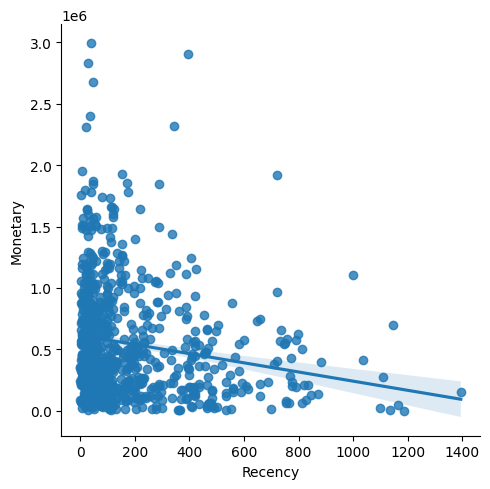

In [ ]:
# Monetary vs Recency
sns.lmplot(x = 'Recency', y = 'Monetary', data=rfm, fit_reg=True)

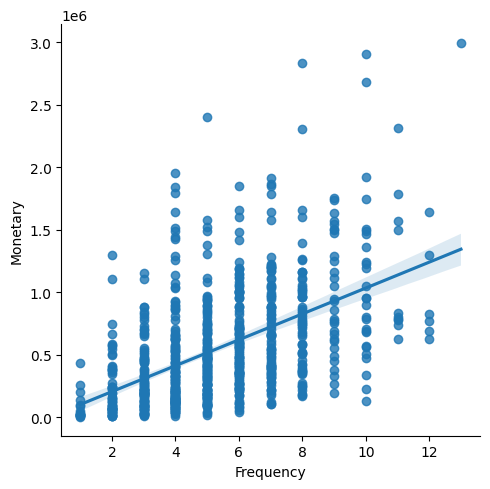

In [ ]:
# Monetary vs Frequency
sns.lmplot(x='Frequency', y = 'Monetary', data=rfm, fit_reg=True)

### RFM ANALYSIS

In [ ]:
quantiles = rfm.quantile(q=[0.25, 0.5, 0.75])
quantiles

,Recency,Frequency,Monetary
0.25,35.25,4.0,200520.5
0.50,92.00,5.0,430459.5
0.75,225.75,7.0,773329.0


#### Scoring

In [ ]:
RFMScores = rfm.copy()

#Recency Scoring
def Rscoring(x,p,d):
   if x <= d[p][0.25]:
      return 1
   elif x <= d[p][0.50]:
      return 2
   elif x <= d[p][0.75]:
      return 3
   else:
      return 4

#Frequency and Monetary Scoring
def FMscoring (x,p,d):
   if x <= d[p][0.25]:
      return 4
   elif x <= d[p][0.50]:
      return 3
   elif x <= d[p][0.75]:
      return 2
   else:
      return 1


RFMScores['R']=RFMScores['Recency'].apply(Rscoring, args=('Recency',quantiles))
RFMScores['F']=RFMScores['Frequency'].apply(FMscoring, args=('Frequency',quantiles))
RFMScores['M']=RFMScores['Monetary'].apply(FMscoring, args=('Monetary',quantiles))
RFMScores['RFMgroup']=RFMScores.R.map(str)+RFMScores.F.map(str)+RFMScores.M.map(str)
RFMScores['Score']=RFMScores[['R','F','M']].sum(axis=1)
print(RFMScores.head())

              Recency  Frequency  Monetary  R  F  M RFMgroup  Score
ID_pelanggan                                                       
AA-10315          184          5  166080.0  3  3  4      334     10
AA-10375           19          9  261399.0  1  1  3      113      5
AA-10480          259          4  178749.0  4  4  4      444     12
AA-10645           55          6  991613.0  2  2  1      221      5
AB-10015         1394          2  152224.0  4  4  4      444     12


#### Segmentation using K-Means

<ipython-input-114-559f9f4c9e20>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['Recency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
<ipython-input-114-559f9f4c9e20>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['Frequency'],kde_kws={"color":"b","lw":3,"labe

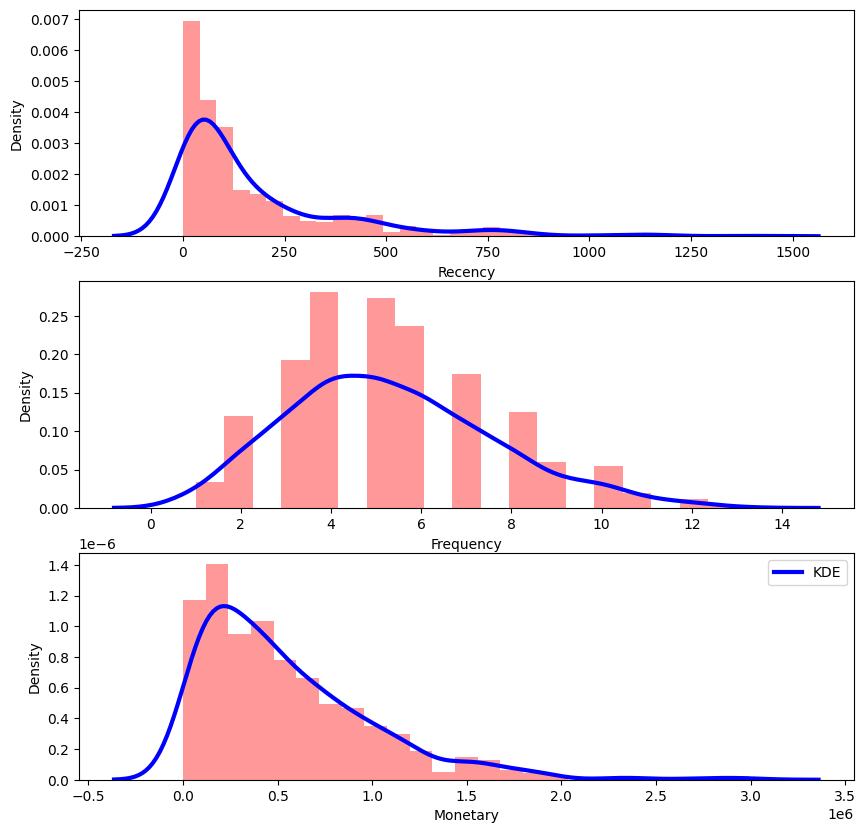

In [ ]:
#Melihat distibusi data hasil RFMScore
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.distplot(rfm['Recency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,2)
sns.distplot(rfm['Frequency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,3)
sns.distplot(rfm['Monetary'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.legend()
plt.show()

In [ ]:
# Melakukan scaling karena data tidak seimbang

clustering_rfm = rfm[['Recency', 'Frequency', 'Monetary']].copy()
clustering_rfm.head()

,Recency,Frequency,Monetary
ID_pelanggan,,,
AA-10315,184,5,166080.0
AA-10375,19,9,261399.0
AA-10480,259,4,178749.0
AA-10645,55,6,991613.0
AB-10015,1394,2,152224.0


In [ ]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(clustering_rfm)

data_scaled = pd.DataFrame(x_scaled, columns = ['Recency', 'Frequency', 'Monetary'])
data_scaled.head()

,Recency,Frequency,Monetary
0,0.131994,0.333333,0.055324
1,0.013630,0.666667,0.087167
2,0.185796,0.250000,0.059557
3,0.039455,0.416667,0.331106
4,1.000000,0.083333,0.050695


Karena kita ingin membagi hanya menjadi 3 cluster, maka kita langsung gunakan k = 3. Tidak perlu elbow atau silhouette score untuk mengetahui nilai k

NAMUN, ada baiknya kita tahu pada k berapa dia optimal

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

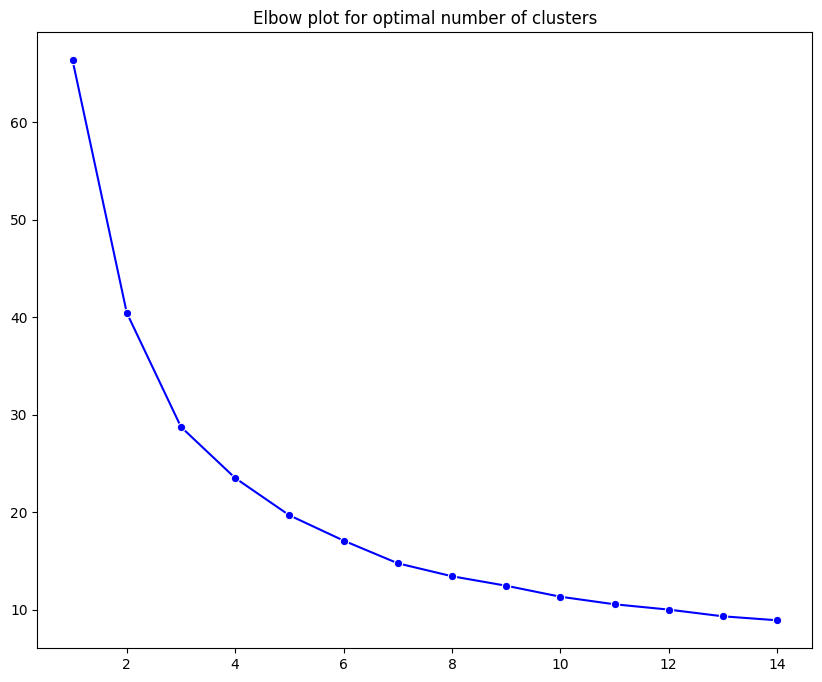

In [ ]:
wscc = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(data_scaled)
    wscc.append(kmeans.inertia_)

plt.figure(figsize=(10,8))
sns.lineplot(x=range(1,15),y=wscc,marker="o",c='blue')
plt.title("Elbow plot for optimal number of clusters")

Ternyata kebetulan k optimal ada pada k = 3

In [ ]:
# Clustering dengan menggunakan K-Means

kmeans = KMeans(n_clusters = 3, random_state = 0, init= 'k-means++',
                n_init = 10, max_iter = 300).fit(data_scaled)

pred = kmeans.predict(data_scaled)
RFMScores['Cluster'] = kmeans.labels_
RFMScores.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMgroup,Score,Cluster
ID_pelanggan,,,,,,,,,
AA-10315,184,5,166080.0,3,3,4,334,10,2
AA-10375,19,9,261399.0,1,1,3,113,5,0
AA-10480,259,4,178749.0,4,4,4,444,12,2
AA-10645,55,6,991613.0,2,2,1,221,5,0
AB-10015,1394,2,152224.0,4,4,4,444,12,1
AB-10060,54,8,171410.0,2,1,4,214,7,0
AB-10105,41,6,695073.0,2,2,2,222,6,2
AB-10150,41,4,873294.0,2,4,1,241,7,2
AB-10165,25,7,1165329.0,1,2,1,121,4,0


In [ ]:
# Ringkasan tiap cluster
RFMScores.groupby('Cluster').mean().sort_values('Score',ascending=False)

<ipython-input-119-a2c5cbb2c8ad>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  RFMScores.groupby('Cluster').mean().sort_values('Score',ascending=False)


,Recency,Frequency,Monetary,R,F,M,Score
Cluster,,,,,,,
1,566.714286,3.105263,3.028485e+05,4.000000,3.834586,3.120301,10.954887
2,96.420290,4.572464,3.627559e+05,2.236715,3.193237,2.908213,8.338164
0,95.189300,7.847737,1.001772e+06,2.119342,1.539095,1.465021,5.123457


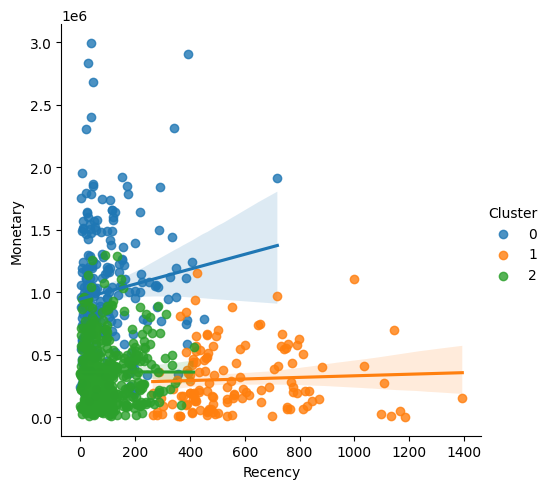

In [ ]:
# Ringkasan untuk Monetary vs Recency dalam bentuk grafik
sns.lmplot(x='Recency', y='Monetary', data=RFMScores, hue='Cluster', fit_reg=True)

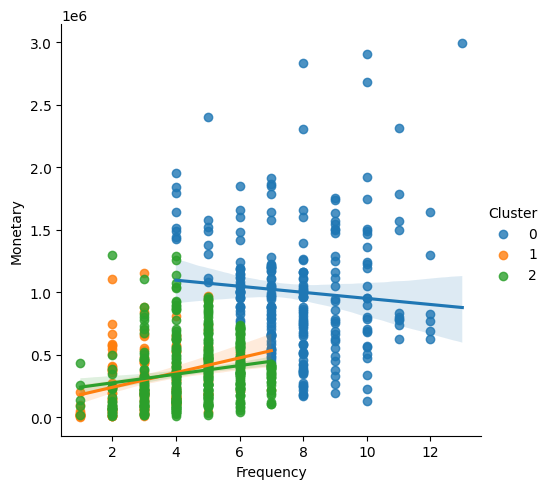

In [ ]:
# Ringkasan untuk Monetary vs Frequency dalam bentuk grafik
sns.lmplot(x='Frequency', y='Monetary', data=RFMScores, hue='Cluster')

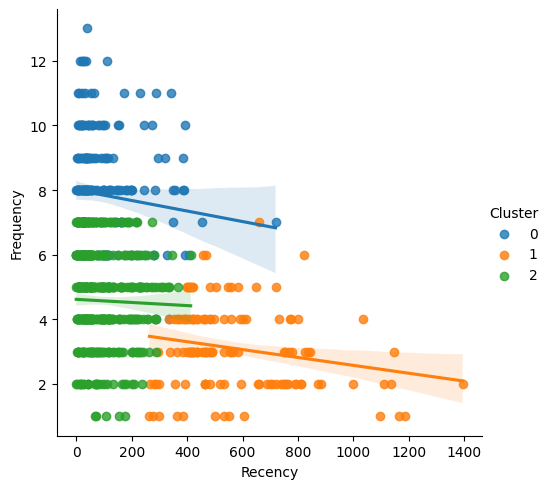

In [ ]:
# Ringkasan untuk Recency vs Frequency dalam bentuk grafik
sns.lmplot(x='Recency', y='Frequency', data=RFMScores, hue='Cluster', fit_reg=True)

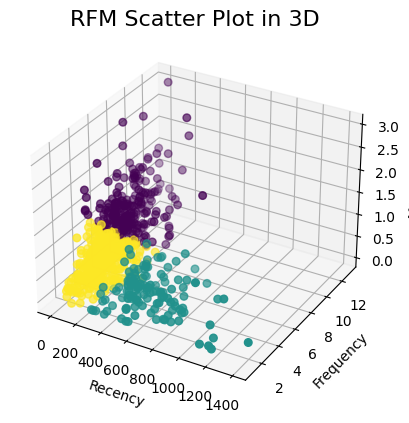

In [ ]:
# Plot 3D RFM
ax = plt.axes(projection='3d')
ax.scatter3D(RFMScores['Recency'],
             RFMScores['Frequency'],
             RFMScores['Monetary'],
             s=30, c = RFMScores['Cluster'])

plt.title('RFM Scatter Plot in 3D', fontsize=16)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

### KESIMPULAN/SARAN

Berdasarkan grafik di atas, telah terbagi menjadi 3 Cluster.
- Cluster 1 adalah cluster customer yang berdasarkan frequency jarang melakukan transaksi dan berdasarkan monetary sedikit pengeluaran dalam berbelanja.

- Cluster 0 adalah cluster customer yang berdasarkan frequency mulai sering dalam melakukan transaksi dan berdasarkan monetary pengeluarannya mulai dari rendah ke sedang.

- Cluster 2 adalah cluster customer yang berdasarkan frequency sangat sering dalam melakukan transaksi dan berdasarkan monetary pengeluarnnya mulai dari sedang ke tinggi.


Maka dari itu, pembagian promo beserta alasannya sebagai berikut.

- Pelanggan silver diisi oleh Cluster 1, karena Cluster 1 adalah kelompok pelanggan yang jarang berbelanja dan mengeluarkan sedikit uang untuk berbelanja. Pelanggan silver akan diberikan promo kecil.

- Pelanggan Gold diisi oleh Cluster 0 karena Cluster 0 adalah kelompok pelanggan di antara pelanggan Silver dan Platinum. Pelanggan Gold akan diberikan promo sedang.

- Pelanggan Platinum diisi oleh Cluster 2 karena Cluster 2 adalah kelompok pelanggan yang sering berbelanja dan mengeluarkan uang yang besar untuk berbelanja. Pelanggan Platinum akan diberikan promo besar.